# Automatic abnormal behaviour detection (anomaly detection)

In [1]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np

### Create some test normal behaviour data

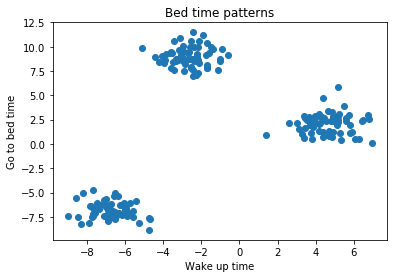

In [2]:
data,_ = make_blobs(n_samples=200, 
                    n_features=2, 
                    centers=3,
                    random_state=42)

plt.scatter(data[:,0], data[:,1])
plt.ylabel('Go to bed time')
plt.xlabel('Wake up time')
plt.title('Bed time patterns')
plt.show()

### Create some test abnormal behaviour data

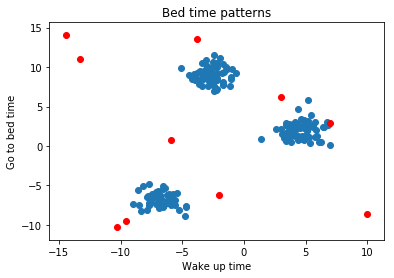

In [3]:
np.random.seed(42)
anomalies = (np.random.random([10,2])*30)-15

plt.scatter(data[:,0], data[:,1])
plt.scatter(anomalies[:,0], anomalies[:,1], c='r')
plt.ylabel('Go to bed time')
plt.xlabel('Wake up time')
plt.title('Bed time patterns')
plt.show()

### Combine normal and abnormal behaviour data

(200, 2) (10, 2) (210, 2)


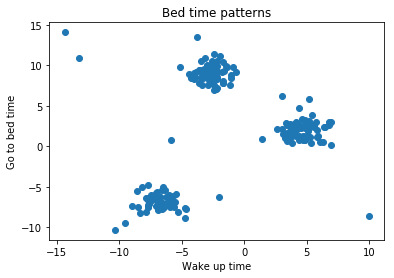

In [4]:
data_mess = np.append(data, anomalies, axis=0)
print(data.shape, anomalies.shape, data_mess.shape)

plt.scatter(data_mess[:,0], data_mess[:,1])
plt.ylabel('Go to bed time')
plt.xlabel('Wake up time')
plt.title('Bed time patterns')
plt.show()

### Build machine learning model

In [5]:
from sklearn.neighbors import LocalOutlierFactor

In [6]:
lof = LocalOutlierFactor(n_neighbors=20,
                         metric='euclidean',
                         # we know that 5% of the data are anomolous
                         contamination=0.05) 

### Predict which bits of behaviour are abnormal

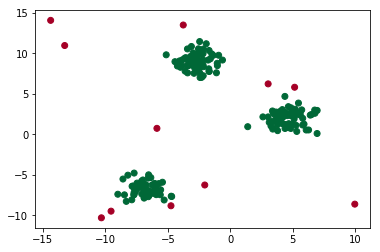

In [7]:
preds = lof.fit_predict(data_mess)

plt.scatter(data_mess[:,0], 
            data_mess[:,1], 
            c=preds,
            cmap='RdYlGn')
plt.show()

### Show severity of abnormal behaviour

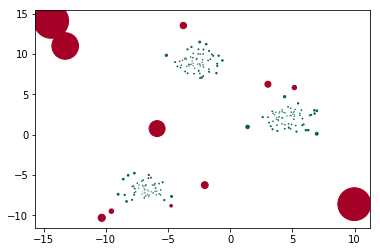

In [8]:
distances,_ = lof.kneighbors(data_mess, return_distance=True)

distances_scores = distances.mean(axis=1)

plt.scatter(data_mess[:,0], 
            data_mess[:,1], 
            c=preds, 
            s=distances_scores**3,
            cmap='RdYlGn')
plt.show()